In [1]:
##############################################################################
#
# Workshop: How to develop a personalised machine learning-based application
#
# Notebook 2: Classification
#
##############################################################################

In [2]:
# jupyter notebook instructions:
# - Every cell can be executed seperately from the rest.
# - You can execute cells in a non-sequential order (but be carefull of 
#   the dependencies between them).
# - Execute a cell by pressing the play button or Shift+Enter.

In [37]:
# Import necessary modules
import numpy as np
import scipy.stats as stats
import pandas as pd

from sklearn import linear_model
from sklearn import preprocessing
from sklearn import metrics

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

In [12]:
# Define the sigmoid function
def sigmoid(t):
    return (1/(1 + np.e**(-t)))

In [13]:
# Define a value range
x = np.arange(-6, 6, 0.1)
y = sigmoid(x)

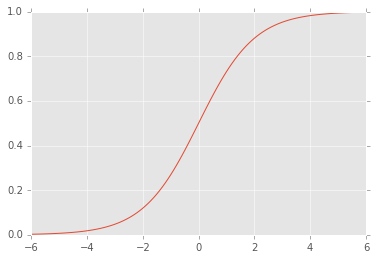

In [15]:
# Plot the sigmoid function for the given value space
plt.plot(x, y)

In [16]:
# Kaggle's Titanic problem is a great problem to experiment with 
# data analysis and various algorithms. 
# It can be found here: https://www.kaggle.com/c/titanic
# We'll use logistic regression to predict the survival rate.

In [17]:
# Load the data in a Pandas dataframe
titanic_df = pd.read_csv("../data/titanic_train_set.csv")

In [30]:
# Lets have a look in the data
print("Columns: %s" % titanic_df.columns)
titanic_df.sample(3)

Columns: Index([u'survived', u'pclass', u'name', u'sex', u'age', u'sibsp', u'parch',
       u'ticket', u'fare', u'cabin', u'embarked'],
      dtype='object')


,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
676,0,3,"Sawyer, Mr. Frederick Charles",male,24.5,0,0,342826,8.0500,n,S
646,0,3,"Cor, Mr. Liudevit",male,19.0,0,0,349231,7.8958,n,S
167,0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.0,1,4,347088,27.9000,n,S


In [22]:
# Prepare the data so they can be used by Scikit Learn
cabin = titanic_df["cabin"].astype(str) # Convert the cabin to string

cabin2 = np.array([cabin[0] for cabin in cabin]) # Take the first letter of the cabin class

titanic_df["cabin"] = pd.Categorical(cabin2) # Replace the old Cabin attribute with its categorical version

# Add the median age as the default value when age is unknown (NA)
titanic_df["age"] = np.where(titanic_df["age"].isnull(), # If there is no value in 'age'
                            28,                          # Set it to 28 
                            titanic_df["age"])           # Otherwise keep the existing

In [32]:
# Initialize encoder
label_encoder = preprocessing.LabelEncoder()

# Convert Sex, Class and Cabin attributes to a numeric ones
encoded_sex = label_encoder.fit_transform(titanic_df["sex"])
encoded_class = label_encoder.fit_transform(titanic_df["pclass"])
encoded_cabin = label_encoder.fit_transform(titanic_df["cabin"])

features_training = pd.DataFrame([encoded_class,
                                     encoded_cabin,
                                     encoded_sex,
                                     titanic_df["age"]]).T

# Initialize the model
log_res_model = linear_model.LogisticRegression()

# Train the model
log_res_model.fit(X = features_training,
                  y = titanic_df['survived'])

# Print the model's intercept and coefficients
print("Intercept: %s" % log_res_model.intercept_)
print("Coefficients: %s" % log_res_model.coef_)

Intercept: [ 3.32716302]
Coefficients: [[-0.90790164 -0.06426483 -2.43179802 -0.0265924 ]]


In [33]:
# Predict for the given data
predictions = log_res_model.predict(X = features_training)

In [34]:
# Compare predictions vs actual figures (Confusion Matrix)
pd.crosstab(predictions, titanic_df["survived"])

survived,0,1
row_0,,
0,463,98
1,86,244


In [35]:
# Calculate the model's accuracy
log_res_model.score(X = features_training,
                   y = titanic_df["survived"])

0.79349046015712688

In [40]:
# Or view a summary of common classification metrics
# 
# Precision: tp / (tp + fp)
# Recall: tp / (tp + fn)
# f1 (or F-beat): Weighted harmonic mean of the precision and recall, 
#                 where an F-beta score reaches its best value at 1 
#                 and worst score at 0.
# support: The number of occurrences of each class in the actual y.
print(metrics.classification_report(y_true = titanic_df["survived"],
                              y_pred = predictions))

             precision    recall  f1-score   support

          0       0.83      0.84      0.83       549
          1       0.74      0.71      0.73       342

avg / total       0.79      0.79      0.79       891

